<h1>Data Exploration I</h1>
<h3>
    Heart 
</h3>

In this section we will cover the following topics:

 * Summary Statistics
 * Data Visualization
 * Converting Categorical Data to Numeric
   * Label Encoding
   * One Hot Encoding 
 * Correlations
 * Missing Data
 * Outlier Detection


In [1]:
# Import packages
import random
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import scipy.stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # suppressing FutureWarning for developer-related warnings
%matplotlib inline 

<h4>1.0 The Dataset</h4>

We will be using the Heart Disease UCI dataset from Kaggle to predict patients' heart health. The dataset contains the following columns:
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect



<h4>1.1 Summary Statistics</h4>

In [3]:
# Load the heart dataset
heart = pd.read_csv("/home/user/datasets/heart.csv")
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,type0,140,241,0,1,123,1,0.2,1,0,3,healthy
299,45,1,type3,110,264,0,1,132,0,1.2,1,0,3,healthy
300,68,1,type0,144,193,1,1,141,0,3.4,1,2,3,healthy
301,57,1,type0,130,131,0,1,115,1,1.2,1,1,3,healthy
302,57,0,type1,130,236,0,0,174,0,0.0,1,1,2,healthy


In [4]:
#summarize each feature
heart.describe()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


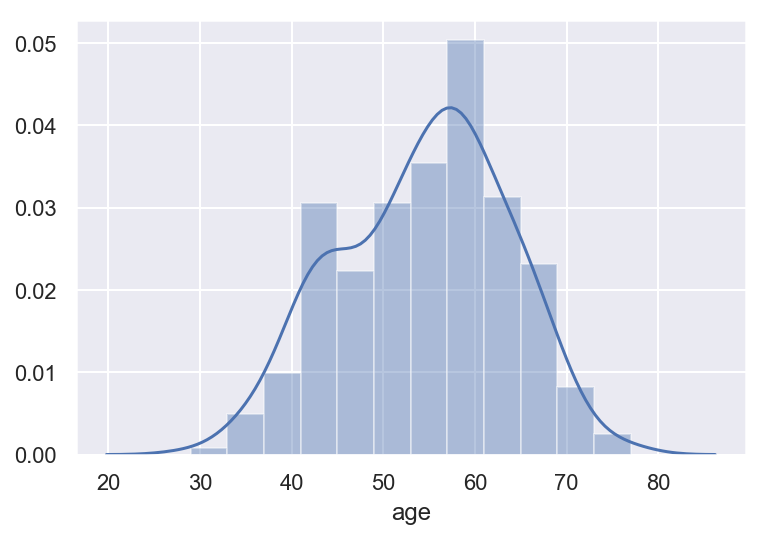

In [5]:
# Create histogram of one variable
sns.distplot(heart['age']);

In [6]:
#calculate metrics separately 
print(np.std(heart['age']))
print(np.mean(heart['age']))
print(np.median(heart['age']))


9.067101638577872
54.366336633663366
55.0


<h4>1.2 Data Visualization</h4>

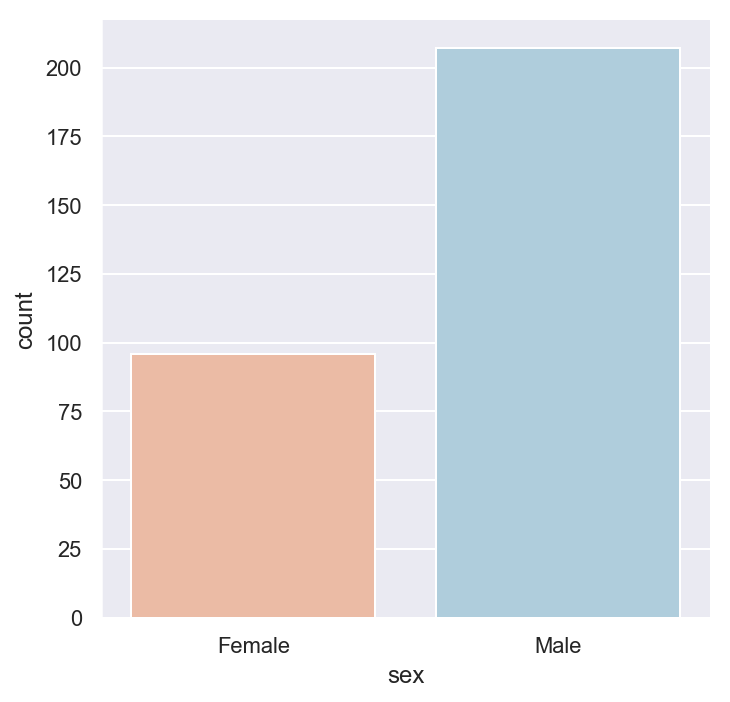

In [7]:
# Create barplot
bar = sns.catplot(x="sex", kind="count", palette="RdBu", data=heart)
bar = bar.set_xticklabels(["Female", "Male"])

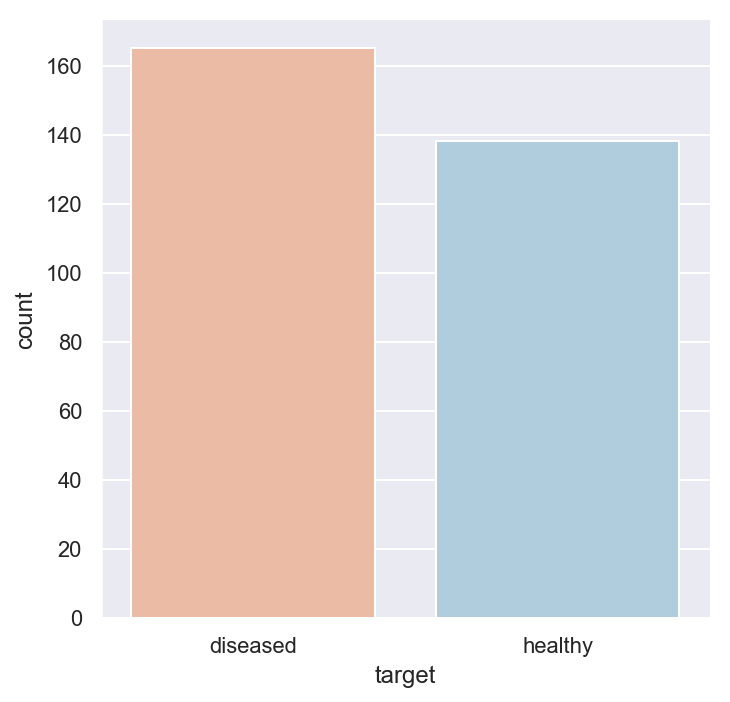

In [8]:
#check final target counts
bar = sns.catplot(x="target", kind="count", palette="RdBu", data=heart)
#bar = bar.set_xticklabels(["healthy", "disease"])

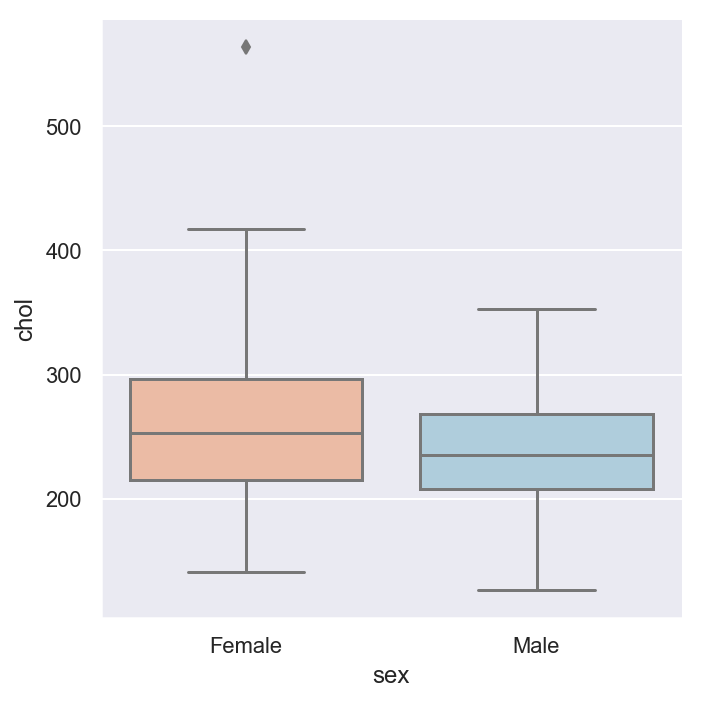

In [9]:
# Create boxplot
box = sns.catplot(x="sex", y="chol", kind="box", data=heart, palette="RdBu")
box = box.set_xticklabels(["Female", "Male"])

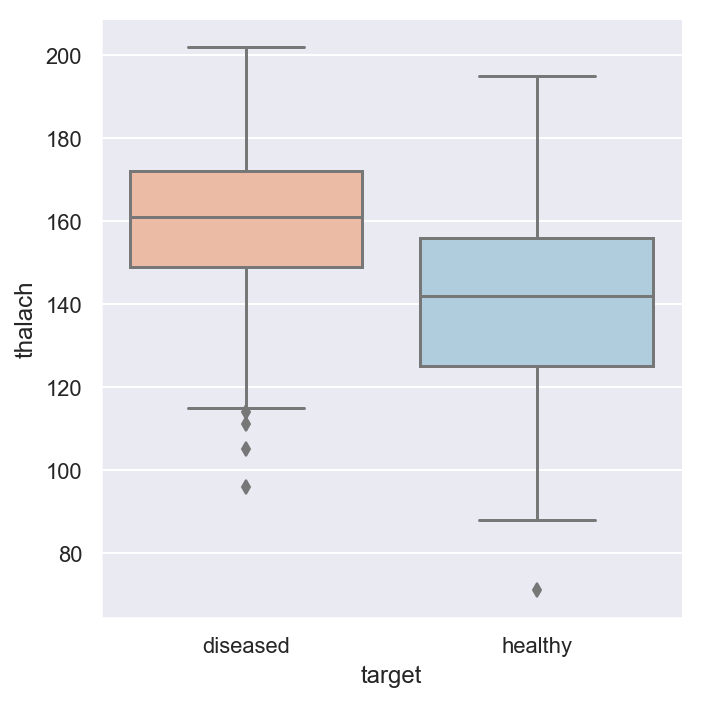

In [10]:
#target vs cholestrol
box = sns.catplot(x="target", y="thalach", kind="box", data=heart, palette="RdBu")


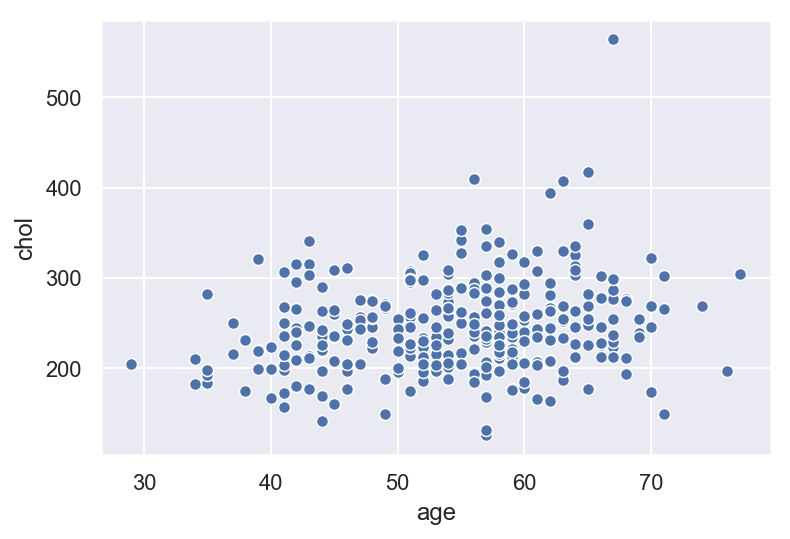

In [11]:
# Create scatterplot of two variables
plot1 = sns.scatterplot(x="age", y="chol", data=heart)

<h4>1.3 Converting Categorical Data to Numeric</h4>
This dataset contains two columns that are categorical: Target and chest pain type. We will be using two approaches to convert them into numeric data: 1) Label Encoding and 2) One Hot Encoding. What is the difference between the two approaches?

In [8]:
heart['target'].value_counts()

diseased    165
healthy     138
Name: target, dtype: int64

In [9]:
#label encoding
heart['target']=heart['target'].map({'healthy':0,'diseased':1})

In [11]:
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [12]:
#one hot endocing
heart=pd.get_dummies(heart, columns=['cp'],drop_first=False, prefix=['cp'])


In [13]:
heart.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_type0,cp_type1,cp_type2,cp_type3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0


In [14]:
#let's save this version of the dataset so we can use in modelling
heart.to_csv('/home/user/datasets/heart_cleaned.csv',index=False)

<h4>1.4 Correlations</h4>

In [16]:
#find the correlation matrix!
heart[['age','sex','chol']].corr()

,age,sex,chol
age,1.000000,-0.098447,0.213678
sex,-0.098447,1.000000,-0.197912
chol,0.213678,-0.197912,1.000000


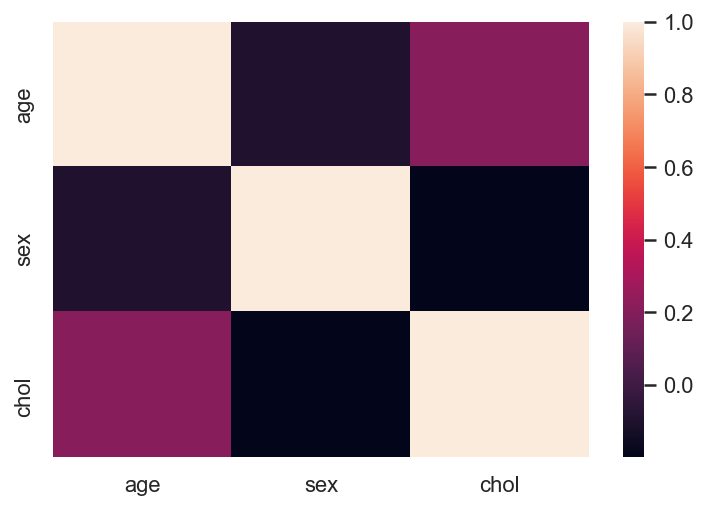

In [18]:
#look at correlation for all variables
sns.heatmap(heart[['age','sex','chol']].corr())

<h3>Challenge 0: Correlated Features</h3>
Spend some time to investigate the correlations above. Visualize pairwise linear relationships for variables with high correlation using scatterplots! Does the scatterplot confirm the relationship? what variable has highest correlation with age?

In [19]:
heart.corr()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_type0,cp_type1,cp_type2,cp_type3
age,1.000000,-0.098447,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,0.138253,-0.147399,-0.059432,0.047516
sex,-0.098447,1.000000,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937,0.089621,-0.041249,-0.116588,0.088043
trestbps,0.279351,-0.056769,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931,0.021447,-0.081851,-0.045107,0.151343
chol,0.213678,-0.197912,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239,0.070684,-0.012750,-0.037918,-0.050589
fbs,0.121308,0.045032,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,-0.060190,-0.060649,0.083679,0.055511
restecg,-0.116211,-0.058196,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,-0.094591,0.077859,0.084196,-0.074654
thalach,-0.398522,-0.044020,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741,-0.376561,0.248317,0.165475,0.079082
exang,0.096801,0.141664,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,0.469061,-0.233863,-0.271028,-0.093384
oldpeak,0.210013,0.096093,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,0.280243,-0.277513,-0.132444,0.086959
slope,-0.168814,-0.030711,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877,-0.216056,0.202807,0.109769,-0.064509


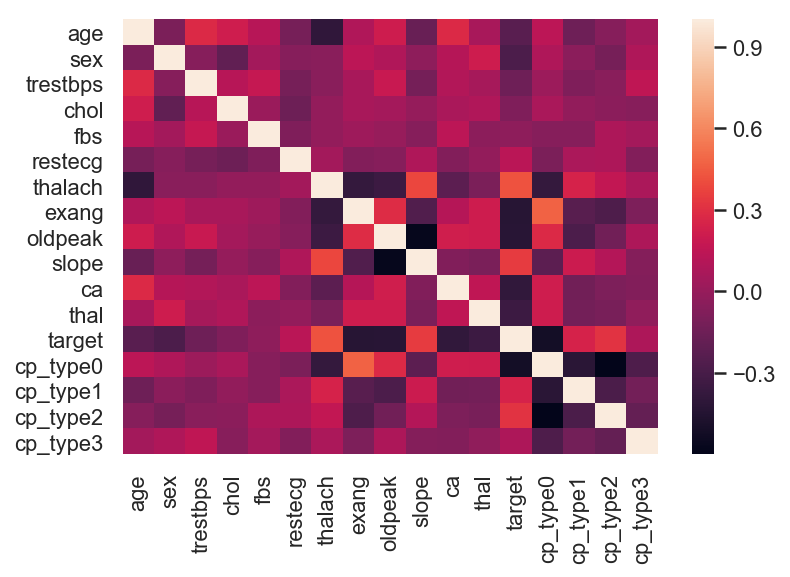

In [20]:
sns.heatmap(heart.corr())


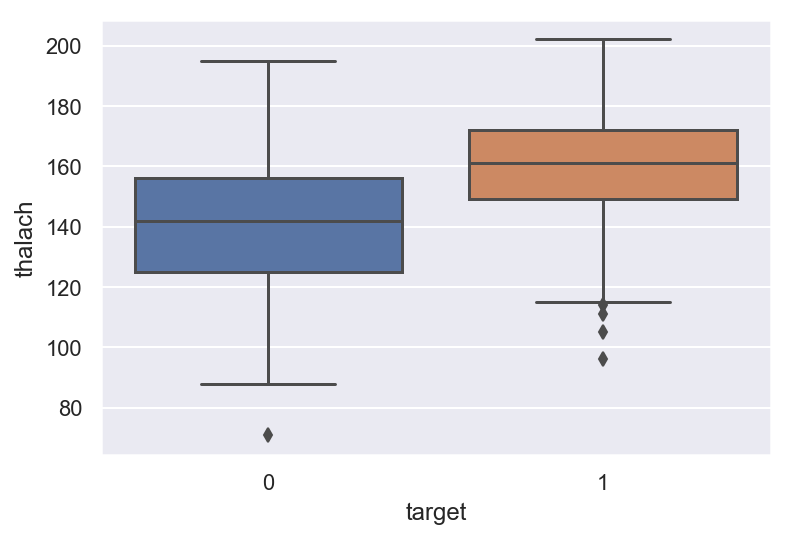

In [22]:
plot1 = sns.boxplot(x="target", y="thalach", data=heart)

In [12]:
#pull a specific correlation
#pd.DataFrame(d.loc[(abs(d['age'])>0.3) & (abs(d['age'])<1),'age'])

<h4>1.4 Missing Data</h4>

In [23]:
# Randomly add NAs to data
import random
random.seed(10)

heart = pd.read_csv("/home/user/datasets/heart.csv")
heart = heart[['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']]
heart.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,63,type3,145,233,1,0,150,0,2.3,0,0
1,37,type2,130,250,0,1,187,0,3.5,0,0
2,41,type1,130,204,0,0,172,0,1.4,2,0
3,56,type1,120,236,0,1,178,0,0.8,2,0
4,57,type0,120,354,0,1,163,1,0.6,2,0


In [24]:
#count how many NA's are there
heart.isna().sum()

age         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
dtype: int64

In [25]:
#randomly add NAs in your data
heart = heart.mask(np.random.random(heart.shape) < .1)
heart.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,63.0,type3,145.0,233.0,NaN,0.0,150.0,0.0,2.3,0.0,0.0
1,37.0,type2,130.0,NaN,0.0,NaN,187.0,0.0,3.5,0.0,0.0
2,41.0,type1,130.0,NaN,0.0,NaN,172.0,0.0,1.4,2.0,0.0
3,56.0,type1,120.0,236.0,0.0,1.0,NaN,NaN,0.8,NaN,0.0
4,57.0,type0,NaN,354.0,0.0,1.0,163.0,1.0,0.6,NaN,0.0


In [26]:
#count how many NA's are introduced
heart.isna().sum()

age         39
cp          28
trestbps    33
chol        37
fbs         29
restecg     34
thalach     34
exang       24
oldpeak     28
slope       21
ca          27
dtype: int64

In [27]:
heart_noNA = heart.dropna(axis=0,thresh=11)   #axis =1 for cols, 0 for rows. thresh=number of non NAs

heart_noNA.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
10,54.0,type0,140.0,239.0,0.0,1.0,160.0,0.0,1.2,2.0,0.0
13,64.0,type3,110.0,211.0,0.0,0.0,144.0,1.0,1.8,1.0,0.0
14,58.0,type3,150.0,283.0,1.0,0.0,162.0,0.0,1.0,2.0,0.0
15,50.0,type2,120.0,219.0,0.0,1.0,158.0,0.0,1.6,1.0,0.0
19,69.0,type3,140.0,239.0,0.0,1.0,151.0,0.0,1.8,2.0,2.0


In [28]:
#how many records did we lose?
heart_noNA.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,54.034483,129.827586,244.643678,0.149425,0.528736,151.655172,0.344828,1.202299,1.298851,0.701149
std,9.378908,16.376534,61.522349,0.358574,0.567309,22.002551,0.478067,1.350622,0.666733,1.111410
min,29.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,204.000000,0.000000,0.000000,141.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,130.000000,234.000000,0.000000,0.000000,154.000000,0.000000,1.000000,1.000000,0.000000
75%,60.500000,140.000000,274.500000,0.000000,1.000000,167.500000,1.000000,1.800000,2.000000,1.000000
max,77.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000


In [20]:
# Fill missing values with mean of each column
heart_noNA_2 = heart.fillna(heart.mean())
heart_noNA_2.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,63.000000,type3,145.0,233.0,1.0,0.0,150.0,0.334572,1.045788,0.0,0.000000
1,54.456835,NaN,130.0,250.0,0.0,1.0,187.0,0.334572,3.500000,0.0,0.710425
2,41.000000,type1,130.0,204.0,0.0,0.0,172.0,0.000000,1.400000,2.0,0.000000
3,56.000000,NaN,120.0,236.0,0.0,1.0,178.0,0.334572,0.800000,2.0,0.000000
4,57.000000,NaN,120.0,354.0,0.0,1.0,163.0,1.000000,0.600000,2.0,0.000000


In [21]:
heart_noNA_2.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.456835,131.636691,246.774809,0.159420,0.534545,149.512915,0.334572,1.045788,1.406593,0.710425
std,8.749831,17.071752,49.408076,0.349955,0.503043,21.767716,0.445316,1.101801,0.592078,0.944278
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,48.500000,120.000000,216.000000,0.000000,0.000000,139.500000,0.000000,0.000000,1.000000,0.000000
50%,54.456835,130.000000,246.774809,0.000000,0.534545,149.512915,0.000000,1.000000,1.406593,0.000000
75%,60.000000,140.000000,269.000000,0.000000,1.000000,163.000000,1.000000,1.550000,2.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000


In [22]:
# [CoCalc-specific package loading] The next 2 lines are used to setup loading for the fancyimpute package
import sys, os
sys.path.insert(0, os.path.expanduser('~/.local/lib/python3.6/site-packages'))

In [23]:
# Fill missing values using KNN
from fancyimpute import KNN
heart_df = pd.DataFrame(
    heart,
    columns = ['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']
)
heart_knn = pd.DataFrame(KNN(k=3).fit_transform(heart_df))
heart_knn.head()

ModuleNotFoundError: No module named 'fancyimpute'

<h4>1.5 Detecting Outliers</h4>

In [13]:
#let's make a copy of the age variable
age = heart['age']

#let's add an outlier to the age variable
len(age)               #find the length of the age variable
age[304]=220           #add the age 120 as a new value
age.tail()             #let's check if it was added

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


299     45
300     68
301     57
302     57
304    220
Name: age, dtype: int64

In [14]:
#find IQR
q75, q25 = np.percentile(age, [75 ,25])
iqr = q75 - q25
print(q25)
print(q75)
print(1.5*iqr)

47.75
61.0
19.875


<h4>Challenge 1: Outlier Detection Function</h4> 
Write a function that:

 * Takes a list
 * Calculates q25,q75 and IQR
 * Returns values that are smaller than q25-1.5*IQR or larger than q75+1.5*IQR

In [18]:
def detect_outlier(x):
    q75, q25 = np.percentile(x, [75 ,25])
    iqr = q75 - q25
    for a in x:
        if a > q75+1.5*iqr:
            print('outlier')
        elif a < q25-1.5*iqr:
            print('outlier')
        else:
            print('ok')

In [19]:
detect_outlier(age)

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
outlier
